In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def convert_dict(dict_i):
    conv = {}
    for type_exp, d1 in dict_i.items():
        for type_gen,d2 in d1.items():
            if type_gen not in conv:
                conv[type_gen] = {}
            conv[type_gen][type_exp]=  {float(k):v for k,v in d2.items()}
    return conv

In [37]:
def load_json(filename):
    import json
    with open(
        filename,
        "r",
    ) as fp:
        dict_i = json.load(fp)  
    return dict_i

In [38]:
def abbreviateValue(value, abbreviations={}):
    for k, v in abbreviations.items():
        if k in value:
            
            value = value.replace(k, v)
    #TODO
    if value[0:2] not in ["q_", "u_"]:
        value = value.replace("_", " ")
    return value
    
def abbreviate_dict_value(input_dict, abbreviations):
    
    conv ={}
    for k1, dict_i in input_dict.items():
        conv[k1] = { abbreviateValue(k, abbreviations): d for k, d in dict_i.items()}
    return conv

In [39]:
name_folder_output = "output"

In [40]:
compute_results = False

In [41]:
if compute_results:
    from experiments_compas_quantile import run_compas_experiments_quantile


    run_compas_experiments_quantile(
        name_output_dir="results",
        min_sup_divergences=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2],
        metrics=["d_fpr"],
        ouput_folder_dir=name_folder_output,
    )

In [42]:
if compute_results:
    from experiments_compas_uniform import run_compas_experiments_uniform


    run_compas_experiments_uniform(
        name_output_dir="results",
        min_sup_divergences=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2],
        metrics=["d_fpr"],
        ouput_folder_dir=name_folder_output,
    )

In [43]:
if compute_results:
    from experiments_compas_default import run_compas_experiments_default


    run_compas_experiments_default(
        name_output_dir="results",
        min_sup_divergences=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2],
        metrics=["d_fpr"],
        ouput_folder_dir=name_folder_output,
    )

In [44]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

# Read data

In [45]:
abbreviations = {"one_at_time":"indiv t.", "all_attributes":"comb t.", "continuous":"c", \
                 "quantile": "quant #bins:", "uniform":"unif #bins:", "weighted_sum_abs_reference_s":"g$\Delta$", "entropy":"entr",\
                "without_gen": "Frequent itemsets", "with_gen": "Generalized itemsets"}

In [46]:
q_abbr = abbreviations["quantile"]
u_abbr = abbreviations["uniform"]

In [47]:
#label_names = {"one_at_time":"indiv t.", "all_attributes":"comb t.", \
#                 "quantile": "q", "uniform":"u", "weighted_sum_abs_reference_s":"w$\Delta$", "entropy":"entr",\
#                "without_gen": "Leaf items", "with_gen": "All items"}

In [48]:
label_names_2 = {"one_at_time":"indiv t.", "all_attributes":"comb t.", \
                 "quantile": "q", "uniform":"u", "weighted_sum_abs_reference_s":"g$\Delta$", "entropy":"entr",\
                "without_gen": "base", "with_gen": "generalized"}

In [49]:
tree_keys = ['weighted_sum_abs_reference_s_one_at_time', 'weighted_sum_abs_reference_s_all_attributes', 'entropy_one_at_time', 'entropy_all_attributes']
tree_keys = [abbreviateValue(k, abbreviations) for k in tree_keys]

In [50]:
info = {}

In [51]:
min_sup_tree = 0.1

metric= "d_fpr"
type_criterion = "weighted_sum_abs_reference_s"

type_criterions = ["weighted_sum_abs_reference_s", "entropy"]
dataset_name = "compas"
import os
output_results= os.path.join(os.path.curdir, name_folder_output, "results")

In [52]:
import os

info_tree = {type_criterion:{} for type_criterion in type_criterions}

info_ex_discr = {}

for info_i in ["max", "FP"]:

    for type_criterion in type_criterions:
        print(type_criterion)
        filename = os.path.join(output_results,dataset_name ,type_criterion,f"stree_{min_sup_tree}", metric, f"info_ALL_{info_i}.json")

        info_tree[type_criterion][info_i] = abbreviate_dict_value(convert_dict(load_json(filename)), abbreviations)
        
    
    filename = os.path.join(output_results, dataset_name , "default", metric, f"info_{info_i}.json")
    print(filename)
    
    dict_i = load_json(filename)

    dict_i={float(k):v for k,v in dict_i.items()}

    info_ex_discr[info_i] = {"user":dict_i}
    
    
    for discr_type in ["quantile", "uniform"]: #quantile, 
        filename = os.path.join(output_results, dataset_name , discr_type, metric, f"info_{info_i}_{discr_type}.json")

        dict_i = load_json(filename)

        dict_i={k:{float(k2):v2 for k2,v2 in dict_i[k].items()} for k in dict_i}

        info_ex_discr[info_i].update(dict_i)
            
    info_ex_discr = abbreviate_dict_value(info_ex_discr, abbreviations)

weighted_sum_abs_reference_s
entropy
./output/results/compas/default/d_fpr/info_max.json
weighted_sum_abs_reference_s
entropy
./output/results/compas/default/d_fpr/info_FP.json


In [53]:
info_tree.keys()

dict_keys(['weighted_sum_abs_reference_s', 'entropy'])

In [54]:
for info_i in info:
    for type_gen in info[info_i]:
        if "all_c" in info[info_i][type_gen]:
            info[info_i][type_gen].pop("all_c")

In [55]:
color_labels = {}
color_labels[abbreviateValue('entropy_one_at_time', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue('entropy_all_attributes', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time', abbreviations)]="orangered"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes', abbreviations)]="orange"
color_labels['user']="crimson"

In [56]:
info_i = "FP"

import matplotlib.pyplot as plt
import numpy as np
ks = [i for i in list(info_ex_discr[info_i].keys()) if q_abbr in i]
colors = plt.cm.YlGn(np.linspace(0, 1, len(ks)+4))[-len(ks):][::-1]
color_labels.update(dict(zip(ks,colors)))

ks = [i for i in list(info_ex_discr[info_i].keys()) if u_abbr in i]
colors = plt.cm.RdPu(np.linspace(0, 1, len(ks)+4))[-len(ks):][::-1]
color_labels.update(dict(zip(ks,colors)))

# Plot max \Delta_FPR

In [57]:
type_gens = ["without_gen", "with_gen"]

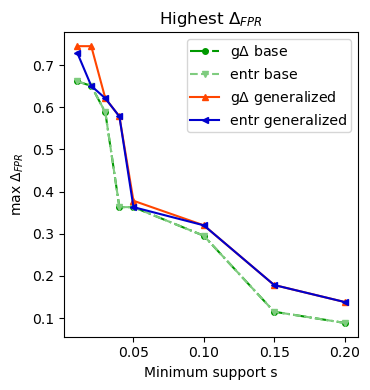

In [58]:
info_i = "max"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)

remove_combined = True


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v })
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all3.pdf")


info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}
from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log",
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

## Only divergence-based criterion

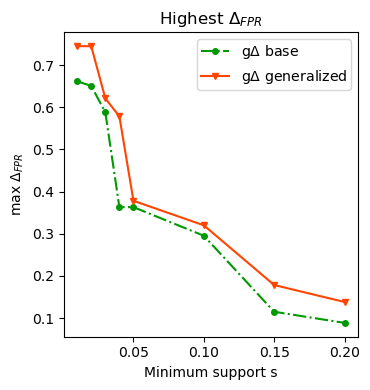

In [59]:
info_i = "max"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)

remove_combined = True


info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["weighted_sum_abs_reference_s"]:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v })
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")


info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}
from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log",
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

## Comparison entropy criterion

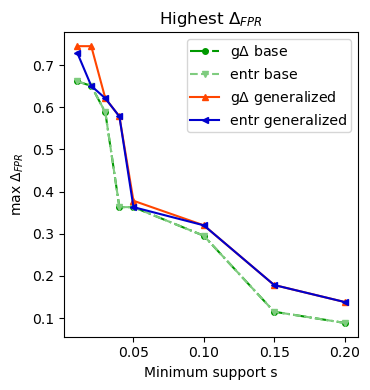

In [64]:
info_i = "max"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)

remove_combined = True


info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v })
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr_entropy.pdf")


info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}
from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log",
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

In [68]:
type_gens

['without_gen', 'with_gen']

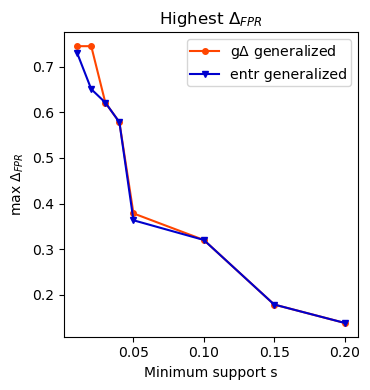

In [69]:
info_i = "max"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( label_names_2["without_gen"] in k and label_names_2["weighted_sum_abs_reference_s"] in k)})


size_fig = (3.8,4)

remove_combined = True


info_plot = {}
for type_gen in ["with_gen"]:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v })
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr_entropy_only_gen.pdf")


info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}
from utils_plot import plotDicts

plotDicts(info_plot, marker=True, \
          linestyle=lines_style, sizeFig=size_fig, title="Highest $\Delta_{FPR}$", #yscale="log",
          xlabel="Minimum support s",  ylabel="max $\Delta_{FPR}$", labelSize=10.2,
          outside=False, color_labels=color_labels, saveFig=True, nameFig = figure_name)

#  Plot FP 

./output_figures/figures/output_performance/compas_stree_0.1_d_fpr_FP_tree_all3.pdf


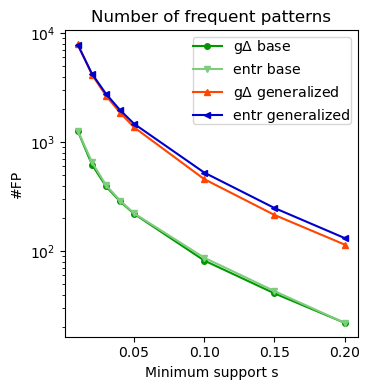

In [60]:
info_i = "FP"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "Leaf" in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( "Leaf" in k and label_names_2["weighted_sum_abs_reference_s_all_attributes"] in k)})


size_fig = (3.8,4)
remove_combined = True

info_plot = {}
for type_gen in type_gens:
    for type_criterion in type_criterions:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_all3.pdf")
print(figure_name)

info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}

from utils_plot import plotDicts

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

## Only divergence-based criterion

./output_figures/figures/output_performance/compas_stree_0.1_d_fpr_FP_tree_div_cr.pdf


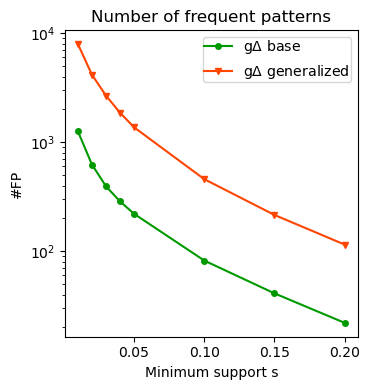

In [61]:
info_i = "FP"

color_labels = {}
color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#7fcc7f"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["without_gen"]}', abbreviations)]="#009900"


color_labels[abbreviateValue(f'entropy_one_at_time {label_names_2["with_gen"]}', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_one_at_time {label_names_2["with_gen"]}', abbreviations)]="orangered"
color_labels[abbreviateValue(f'entropy_all_attributes {label_names_2["with_gen"]}', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue(f'weighted_sum_abs_reference_s_all_attributes {label_names_2["with_gen"]}', abbreviations)]="orange"

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "Leaf" in k and label_names_2["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( "Leaf" in k and label_names_2["weighted_sum_abs_reference_s_all_attributes"] in k)})


size_fig = (3.8,4)
remove_combined = True

info_plot = {}
for type_gen in type_gens:
    for type_criterion in ["weighted_sum_abs_reference_s"]:
        if remove_combined:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v and type_exp!=abbreviations["all_attributes"]})
        else:
            info_plot.update({abbreviateValue(f"{type_criterion}_{type_exp}_{label_names_2[type_gen]}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items() if v})
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_div_cr.pdf")
print(figure_name)

info_plot = {k.replace("indiv t. ", ""):v for k,v in info_plot.items()}
color_labels = {k.replace("indiv t. ", ""):v for k,v in color_labels.items()}
lines_style = {k.replace("indiv t. ", ""):v for k,v in lines_style.items()}

from utils_plot import plotDicts

plotDicts(info_plot,  marker=True, \
          linestyle=lines_style, title="Number of frequent patterns",
          xlabel="Minimum support s",  ylabel="#FP",
          yscale="log", sizeFig=size_fig, labelSize=10.2,
          outside=False, color_labels=color_labels, borderpad=0.05, saveFig=True, nameFig = figure_name)

# Plot comparison discretization

In [26]:
def select_keys(dict_i, keys_sel):
    #return {k:v for k, v in dict_i.items() if k in keys_sel}
    return {k:dict_i[k] for k in keys_sel if k in dict_i}

In [27]:
info_plot_max = {type_gen:{} for type_gen in type_gens}

info_i = "max"
for type_gen in type_gens:
        
    for type_criterion in type_criterions:
        info_plot_max[type_gen].update({abbreviateValue(f"{type_criterion}_{type_exp}", abbreviations):v for type_exp, v in info_tree[type_criterion][info_i][type_gen].items()})

    info_plot_max[type_gen].update(info_ex_discr[info_i])

In [28]:
color_labels = {}
color_labels[abbreviateValue('entropy_one_at_time', abbreviations)]="mediumblue"#colors[0]
color_labels[abbreviateValue('entropy_all_attributes', abbreviations)]="royalblue"#colors[0]
color_labels[abbreviateValue('weighted_sum_abs_reference_s_one_at_time', abbreviations)]="orangered"
color_labels[abbreviateValue('weighted_sum_abs_reference_s_all_attributes', abbreviations)]="orange"
color_labels['user']="crimson"

import numpy as np
ks = [i for i in list(info_plot_max[type_gen].keys()) if q_abbr in i]
colors = plt.cm.YlGn(np.linspace(0, 1, len(ks)+3))[-len(ks):][::-1]
color_labels.update(dict(zip(ks,colors)))

ks = [i for i in list(info_plot_max[type_gen].keys()) if u_abbr in i]
colors = plt.cm.Purples(np.linspace(0, 1, len(ks)+2))[-len(ks):][::-1]
color_labels.update(dict(zip(ks,colors)))

color_labels["unif #bins: 2"] = "darkmagenta"
color_labels['unif #bins: 5'] = "mediumorchid"
color_labels["unif #bins: 6"] = "pink"

print(color_labels.keys())

dict_keys(['entr indiv t.', 'entr comb t.', 'g$\\Delta$ indiv t.', 'g$\\Delta$ comb t.', 'user', 'quant #bins: 2', 'quant #bins: 3', 'quant #bins: 4', 'quant #bins: 5', 'quant #bins: 6', 'unif #bins: 2', 'unif #bins: 3', 'unif #bins: 4', 'unif #bins: 5', 'unif #bins: 6', 'unif #bins: 7', 'unif #bins: 8'])


./output_figures/figures/output_performance/compas_stree_0.1_d_fpr_max_tree_discr_comparison_gen_and_all_sup2.pdf


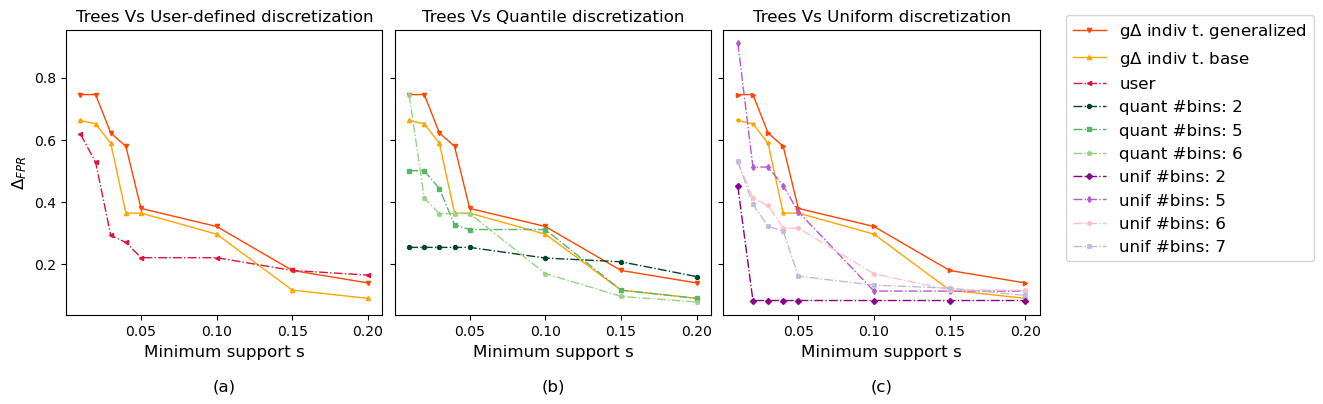

In [29]:
tree_keys = ['weighted_sum_abs_reference_s_one_at_time']
tree_keys = [abbreviateValue(k, abbreviations) for k in tree_keys]


base = {k+f" {label_names_2['without_gen']}":v for k,v in select_keys(info_plot_max["without_gen"], tree_keys).items()}
gen = {k+f" {label_names_2['with_gen']}":v for k,v in select_keys(info_plot_max["with_gen"], tree_keys).items()}

base_keys = list(base.keys())
gen_keys = list(gen.keys())

color_labels[f'{label_names_2["weighted_sum_abs_reference_s"]} {label_names_2["one_at_time"]} {label_names_2["without_gen"]}'] =  "orange"
color_labels[f'{label_names_2["weighted_sum_abs_reference_s"]} {label_names_2["one_at_time"]} {label_names_2["with_gen"]}']="orangered"

show_keys_1 = gen_keys + base_keys +  ["user"]
show_keys_2 =  gen_keys + base_keys + [f"{q_abbr} 2", f"{q_abbr} 5", f"{q_abbr} 6"]
uniform_keys = [f"{u_abbr} 2", f"{u_abbr} 5", f"{u_abbr} 6", f"{u_abbr} 7"]
show_keys_3 =  gen_keys + base_keys + uniform_keys

lines_style = {k:"-" for k in tree_keys}
lines_style.update({k:"dashdot" for k in  ["user"]+uniform_keys+[f"{q_abbr} 2", f"{q_abbr} 5", f"{q_abbr} 6"]})

for k in base_keys:
    lines_style[k] = "-"
for k in gen_keys:
    lines_style[k] = "-"    
info_i = "max"

type_gen = "with_gen"


from copy import deepcopy
merged = deepcopy(info_plot_max[type_gen])
merged.update(base)
merged.update(gen)


info_dicts = {}
info_dicts[0] = select_keys(merged, show_keys_1)
info_dicts[1] = select_keys(merged, show_keys_2)
info_dicts[2] = select_keys(merged, show_keys_3)
    
figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_sup_tree}_{metric}_{info_i}_tree_discr_comparison_gen_and_all_sup2.pdf")
print(figure_name)

save_fig = True


size_fig=(10.4,3.9)


from utils_plot import three_plots
three_plots(info_dicts[0], info_dicts[1], info_dicts[2], \
          color_labels = color_labels, sizeFig=size_fig, fontsize=12, save_fig=save_fig, log_scale=False,
          labels_name =["Trees Vs User-defined discretization", "Trees Vs Quantile discretization", "Trees Vs Uniform discretization"], \
         ylabel="$\Delta_{FPR}$", figure_name=figure_name, linestyle=lines_style)